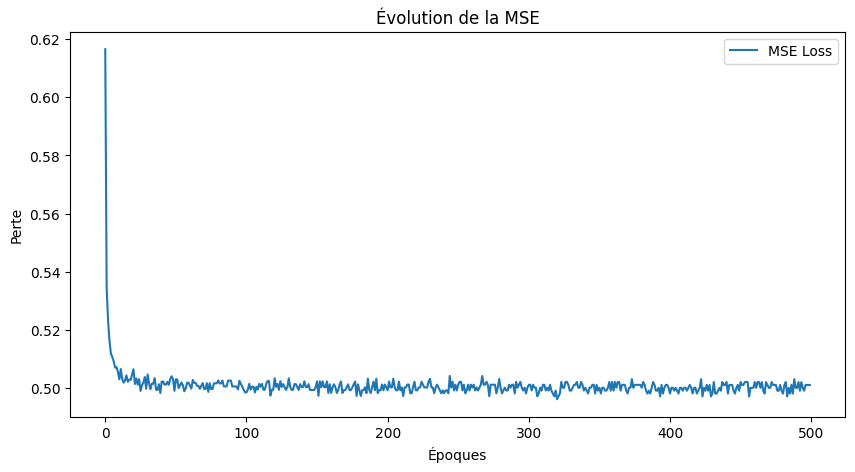

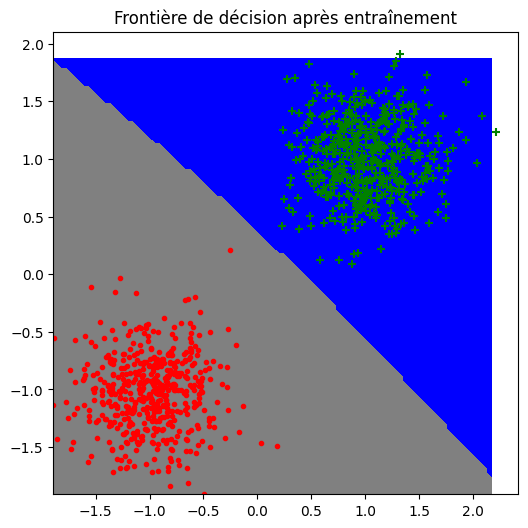

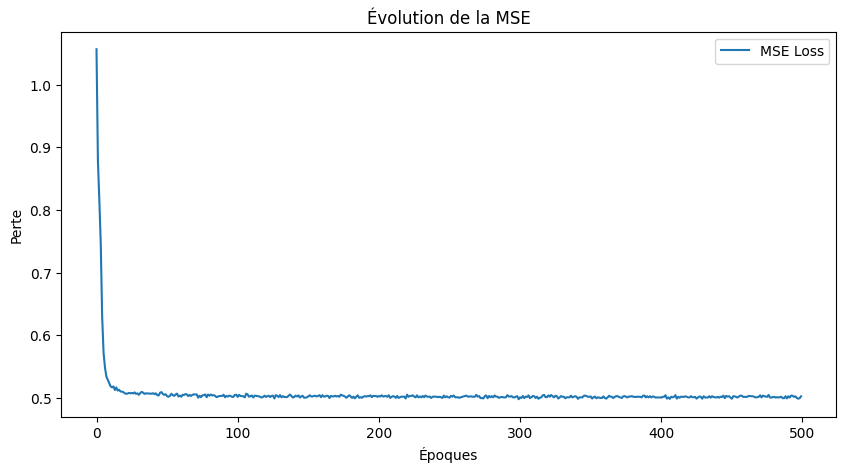

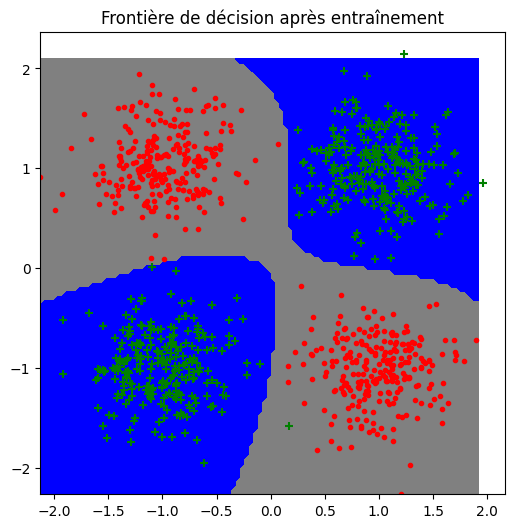

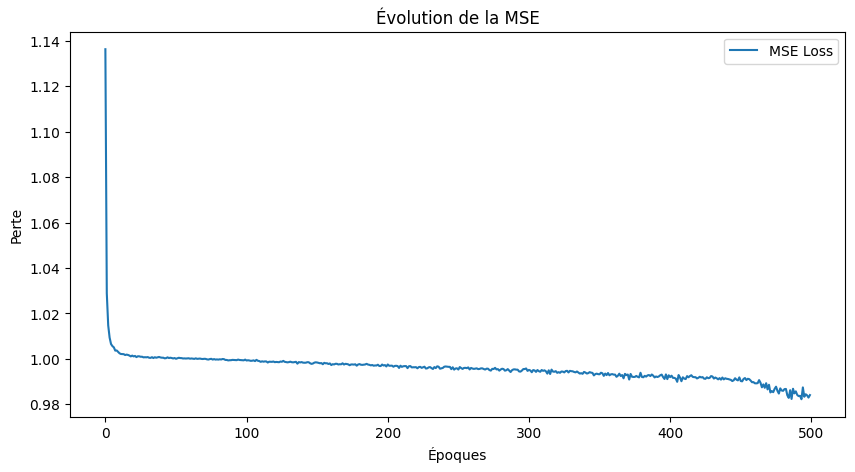

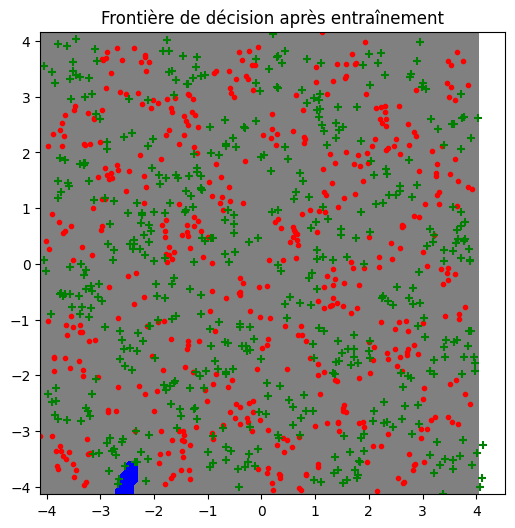

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from module import *
from mltools import *

for i in [0,1,2]:

    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = datay.reshape(-1, 1)

    model = Sequentiel(
        Linear(2, 5),
        TanH(),
        Linear(5, 5),
        TanH(),
        Linear(5, 5),
        TanH(),
        Linear(5, 1),
        Sigmoide()
    )
    loss = MSELoss()

    optimizer = Optim(model, loss, eps=0.05)

    epochs = 500
    batch_size = 16
    losses = []

    for epoch in range(epochs):
        indices = np.random.permutation(len(datax))
        batch_losses = []

        for i in range(0, len(datax), batch_size):
            batch_x = datax[indices[i:i + batch_size]]
            batch_y = datay[indices[i:i + batch_size]]

            optimizer.step(batch_x, batch_y)

            y_hat = model.forward(batch_x)
            batch_loss = loss.forward(batch_y, y_hat).mean()
            batch_losses.append(batch_loss)

        losses.append(np.mean(batch_losses))

    plt.figure(figsize=(10, 5))
    plt.plot(losses, label="MSE Loss")
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.title("Évolution de la MSE")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(model.forward(x)), step=100)
    plot_data(datax, datay)
    plt.title("Frontière de décision après entraînement")
    plt.show()


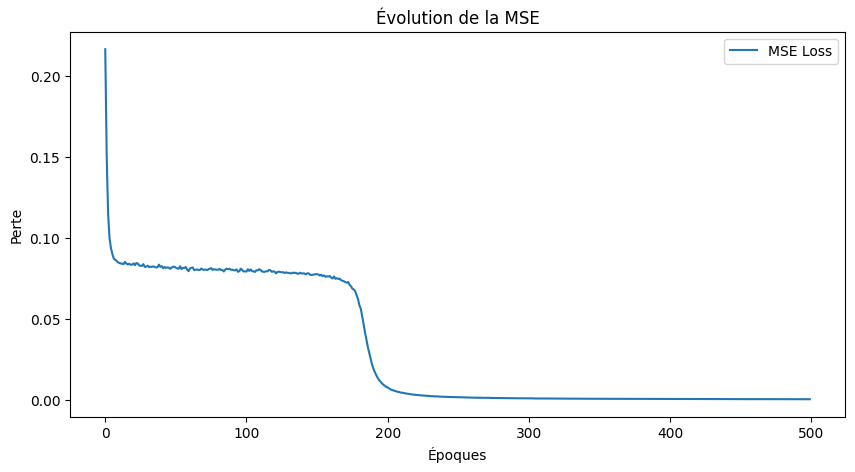

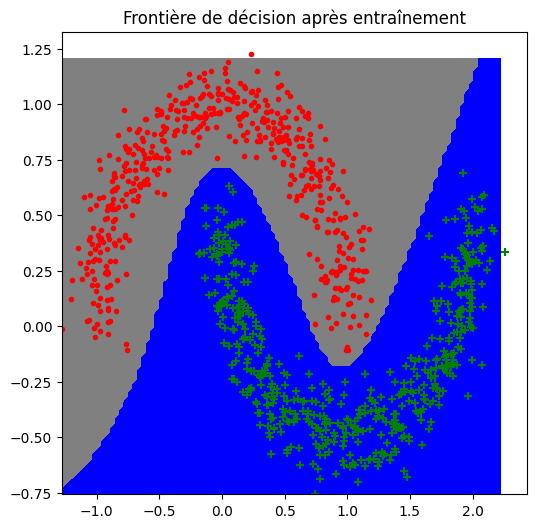

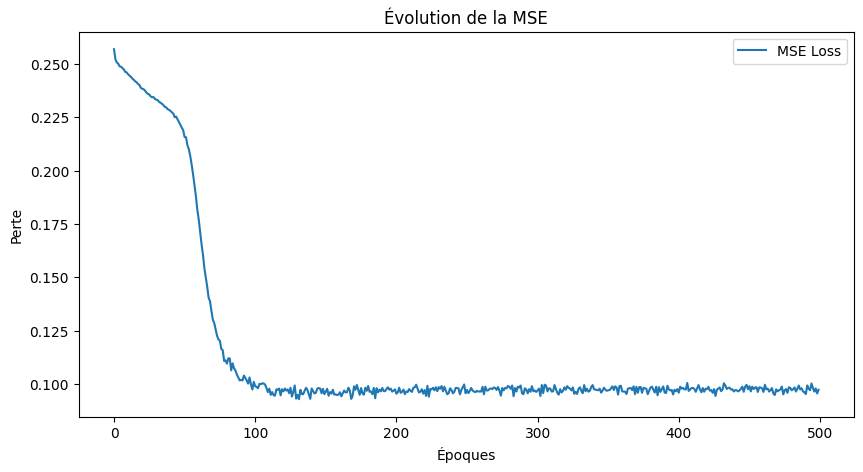

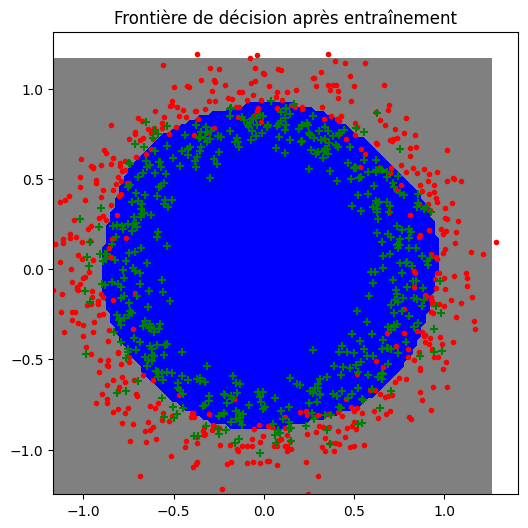

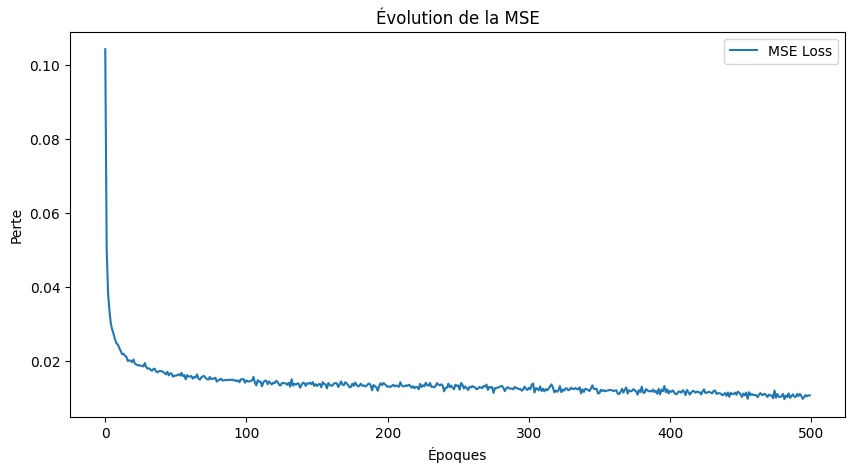

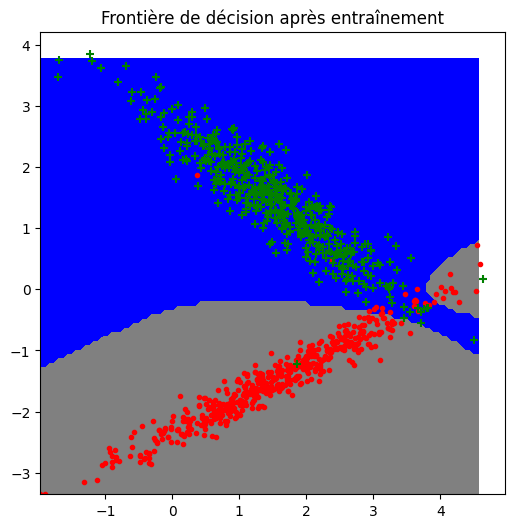

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from module import *
from mltools import *

for i in [0,1,2]:

    datax, datay = gen_arti2(data_type=i, epsilon=0.1)
    datay = datay.reshape(-1, 1)

    model = Sequentiel(
        Linear(2, 5),
        TanH(),
        Linear(5, 5),
        TanH(),
        Linear(5, 5),
        TanH(),
        Linear(5, 1),
        Sigmoide()
    )
    loss = MSELoss()

    optimizer = Optim(model, loss, eps=0.05)

    epochs = 500
    batch_size = 16
    losses = []

    for epoch in range(epochs):
        indices = np.random.permutation(len(datax))
        batch_losses = []

        for i in range(0, len(datax), batch_size):
            batch_x = datax[indices[i:i + batch_size]]
            batch_y = datay[indices[i:i + batch_size]]

            optimizer.step(batch_x, batch_y)

            y_hat = model.forward(batch_x)
            batch_loss = loss.forward(batch_y, y_hat).mean()
            batch_losses.append(batch_loss)

        losses.append(np.mean(batch_losses))

    plt.figure(figsize=(10, 5))
    plt.plot(losses, label="MSE Loss")
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.title("Évolution de la MSE")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(model.forward(x)), step=100)
    plot_data(datax, datay)
    plt.title("Frontière de décision après entraînement")
    plt.show()


Époque 0, Perte : 0.9093
Époque 50, Perte : 0.5031
Époque 100, Perte : 0.5035
Époque 150, Perte : 0.4974
Époque 200, Perte : 0.4973
Époque 250, Perte : 0.4992
Époque 300, Perte : 0.5012
Époque 350, Perte : 0.5001
Époque 400, Perte : 0.5011
Époque 450, Perte : 0.5011


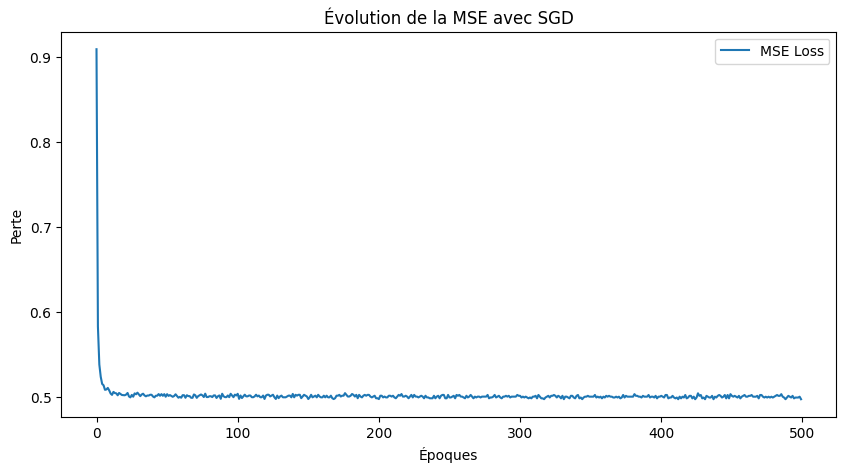

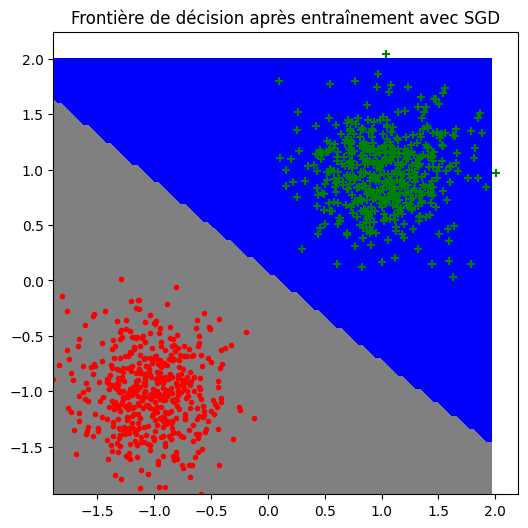

Époque 0, Perte : 1.2650
Époque 50, Perte : 0.5047
Époque 100, Perte : 0.5008
Époque 150, Perte : 0.5020
Époque 200, Perte : 0.5017
Époque 250, Perte : 0.5005
Époque 300, Perte : 0.4994
Époque 350, Perte : 0.5023
Époque 400, Perte : 0.4993
Époque 450, Perte : 0.4993


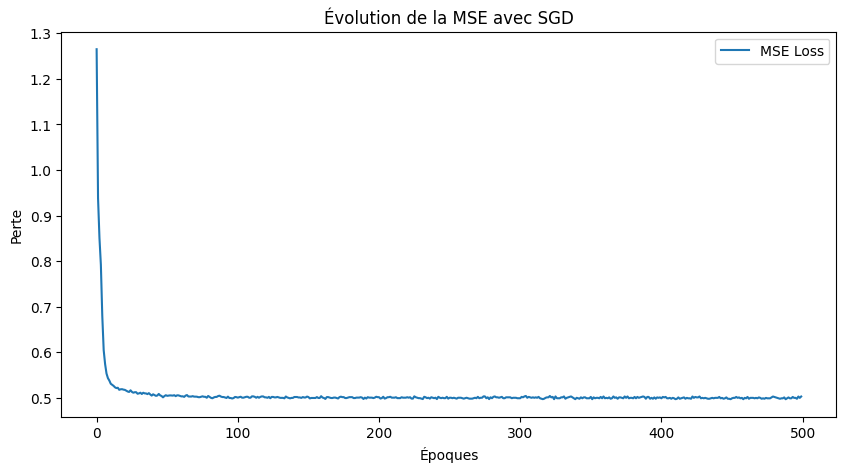

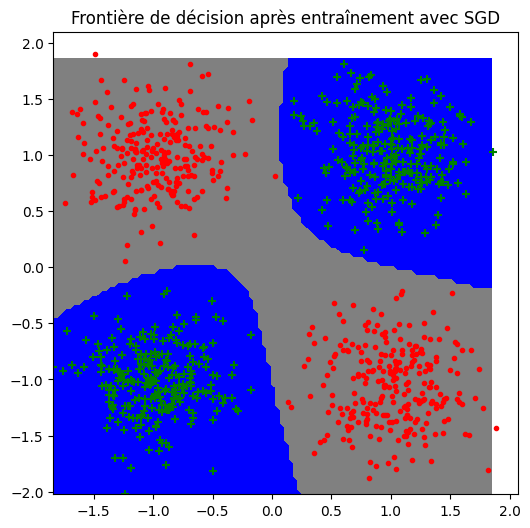

Époque 0, Perte : 1.1360
Époque 50, Perte : 1.0004
Époque 100, Perte : 0.9956
Époque 150, Perte : 0.9947
Époque 200, Perte : 0.9939
Époque 250, Perte : 0.9939
Époque 300, Perte : 0.9909
Époque 350, Perte : 0.9817
Époque 400, Perte : 0.9713
Époque 450, Perte : 0.9679


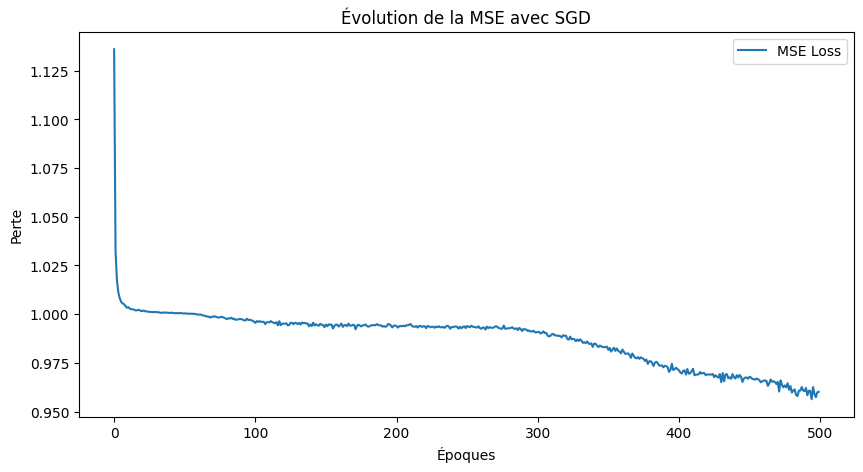

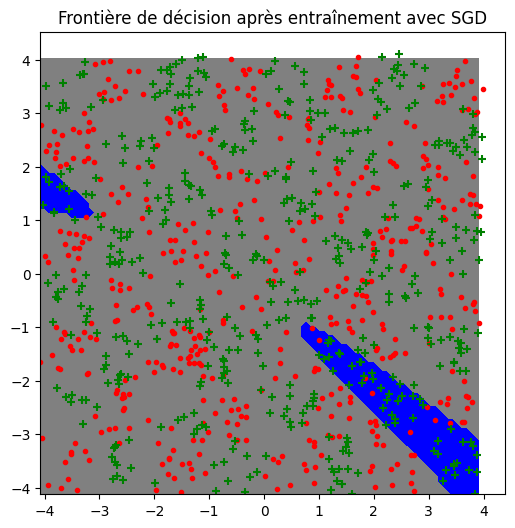

In [9]:
def SGD(network, datax, datay, loss, batch_size=10, lr=0.01, epochs=500):

    optimizer = Optim(network, loss, eps=lr)
    losses = []

    for epoch in range(epochs):
        indices = np.random.permutation(len(datax))  
        batch_losses = []

        for i in range(0, len(datax), batch_size):
            batch_x = datax[indices[i:i + batch_size]]
            batch_y = datay[indices[i:i + batch_size]]

            optimizer.step(batch_x, batch_y)  

            y_hat = network.forward(batch_x)
            batch_loss = loss.forward(batch_y, y_hat).mean()
            batch_losses.append(batch_loss)

        losses.append(np.mean(batch_losses))  

        if epoch % 50 == 0:
            print(f"Époque {epoch}, Perte : {losses[-1]:.4f}")

    return losses, network
for i in [0,1,2]:
    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = datay.reshape(-1, 1)

    network = Sequentiel(
        Linear(2, 5),
        TanH(),
        Linear(5, 5),
        TanH(),
        Linear(5, 5),
        TanH(),
        Linear(5, 1),
        Sigmoide()
    )
    loss = MSELoss()

    losses, trained_model = SGD(network, datax, datay, loss, batch_size=16, lr=0.05, epochs=500)

    plt.figure(figsize=(10, 5))
    plt.plot(losses, label="MSE Loss")
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.title("Évolution de la MSE avec SGD")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(trained_model.forward(x)), step=100)
    plot_data(datax, datay)
    plt.title("Frontière de décision après entraînement avec SGD")
    plt.show()
